In [70]:
# Import all libraries needed for the tutorial

# General syntax to import specific functions in a library: 
##from (library) import (specific library function)
from pandas import DataFrame, read_csv

# General syntax to import a library but no functions: 
##import (library) as (give the library a nickname/alias)
import matplotlib.pyplot as plt
import pandas as pd #this is how I usually import pandas
import sys #only needed to determine Python version number
import matplotlib #only needed to determine Matplotlib version number

# Enable inline plotting
%matplotlib inline

import scipy
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt

In [72]:
print('Python version ' + sys.version)
print('Pandas version ' + pd.__version__)
print('Matplotlib version ' + matplotlib.__version__)
print('Scipy version ' + scipy.__version__)

Python version 3.7.4 (default, Aug 13 2019, 15:17:50) 
[Clang 4.0.1 (tags/RELEASE_401/final)]
Pandas version 0.25.1
Matplotlib version 3.1.1
Scipy version 1.3.1


In [4]:
# file path of csv file
Location = r'/Users/louiseplacidet/Desktop/PIR/Data/data_spikes/E18KABaseline_Bcut.txt'

# create dataframe
df = pd.read_csv(Location, sep='\t',skiprows=[0,1,3] , index_col='%t           ')
df

/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/arraysetops.py:568: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,El 21,El 31,El 41,El 22,El 32,El 42,El 23,El 33,El 43
%t,,,,,,,,,
0.00,-2.84,-1.02,-7.05,-3.18,-3.41,-3.30,-2.27,-1.36,-2.95
0.04,-3.41,-3.30,-8.07,-2.39,-3.75,-2.27,-2.50,-2.27,-0.68
0.08,-4.77,-3.86,-5.80,-1.70,-2.73,-0.34,-2.95,-2.27,0.11
0.12,-5.00,-3.41,-4.32,-2.27,-2.84,0.45,-4.43,-3.64,-1.48
0.16,-3.30,-4.20,-4.09,-1.93,-4.55,1.14,-5.57,-3.52,-1.82
...,...,...,...,...,...,...,...,...,...
301799.80,0.68,0.68,0.23,-0.23,-1.25,3.07,-0.11,0.68,0.45
301799.84,-1.02,-1.14,0.91,0.23,-2.39,2.39,-2.50,1.82,-0.45
301799.88,-1.14,-3.41,0.91,-0.11,-3.41,2.05,-2.50,2.95,-1.36


In [6]:
list(df.columns.values)

['El 21       ',
 'El 31       ',
 'El 41       ',
 'El 22       ',
 'El 32       ',
 'El 42       ',
 'El 23       ',
 'El 33       ',
 'El 43       ']

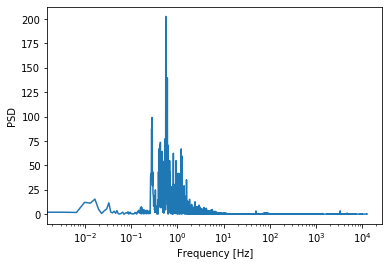

In [21]:
######################################################
#######PERIODOGRAMME

##PERIODOGRAMME ELECTRODE 21 TOUT
fs = 25000

f, Pxx_den = signal.periodogram(df.iloc[:,1], fs)
plt.semilogx(f, Pxx_den)
#plt.semilogy(f,Pxx_den)
#plt.plot(f,Pxx_den)
plt.xlabel('Frequency [Hz]')
plt.ylabel('PSD')
plt.show()

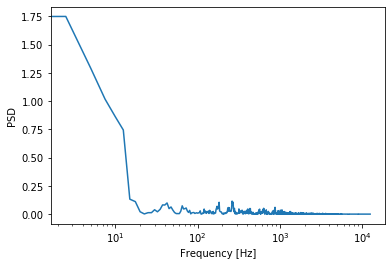

In [18]:
##PERIODOGRAMME ELECTRODE 21 POINTS 10 000 À 20 000

f, Pxx_den = signal.periodogram(df.iloc[10000:20000,1], fs)
plt.semilogx(f, Pxx_den)
#plt.semilogy(f,Pxx_den)
#plt.plot(f,Pxx_den)
plt.xlabel('Frequency [Hz]')
plt.ylabel('PSD')
plt.show()

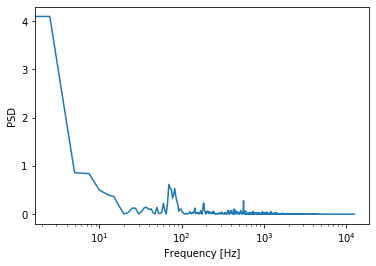

In [19]:
##PERIODOGRAMME ELECTRODE 21 POINTS 20 000 À 30 000

f, Pxx_den = signal.periodogram(df.iloc[20000:30000,1], fs)
plt.semilogx(f, Pxx_den)
#plt.semilogy(f,Pxx_den)
#plt.plot(f,Pxx_den)
plt.xlabel('Frequency [Hz]')
plt.ylabel('PSD')
plt.show()

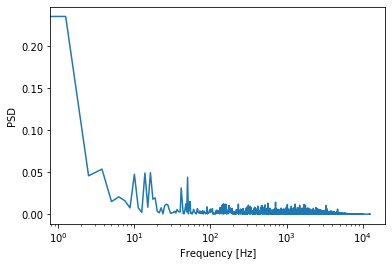

In [20]:
##PERIODOGRAMME ELECTRODE 21 POINTS 40 000 À 60 000

f, Pxx_den = signal.periodogram(df.iloc[40000:60000,1], fs)
plt.semilogx(f, Pxx_den)
#plt.semilogy(f,Pxx_den)
#plt.plot(f,Pxx_den)
plt.xlabel('Frequency [Hz]')
plt.ylabel('PSD')
plt.show()

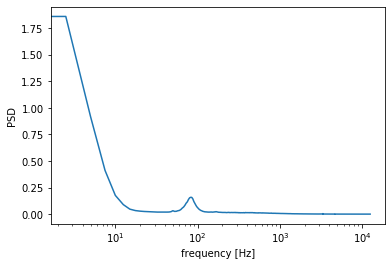

In [29]:
######################################################
#######  WELCH

f, Pxx_den = signal.welch(df.iloc[:,1], fs, nperseg=10000)
#f, Pxx_den = signal.welch(df.iloc[:,1], fs)
plt.semilogx(f, Pxx_den)
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD')
plt.show()

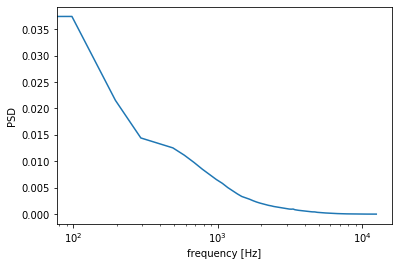

In [30]:
f, Pxx_den = signal.welch(df.iloc[:,1], fs)
plt.semilogx(f, Pxx_den)
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD')
plt.show()

/opt/anaconda3/lib/python3.7/site-packages/scipy/signal/signaltools.py:974: RuntimeWarning: divide by zero encountered in true_divide
  res *= (1 - noise / lVar)
/opt/anaconda3/lib/python3.7/site-packages/scipy/signal/signaltools.py:974: RuntimeWarning: invalid value encountered in multiply
  res *= (1 - noise / lVar)


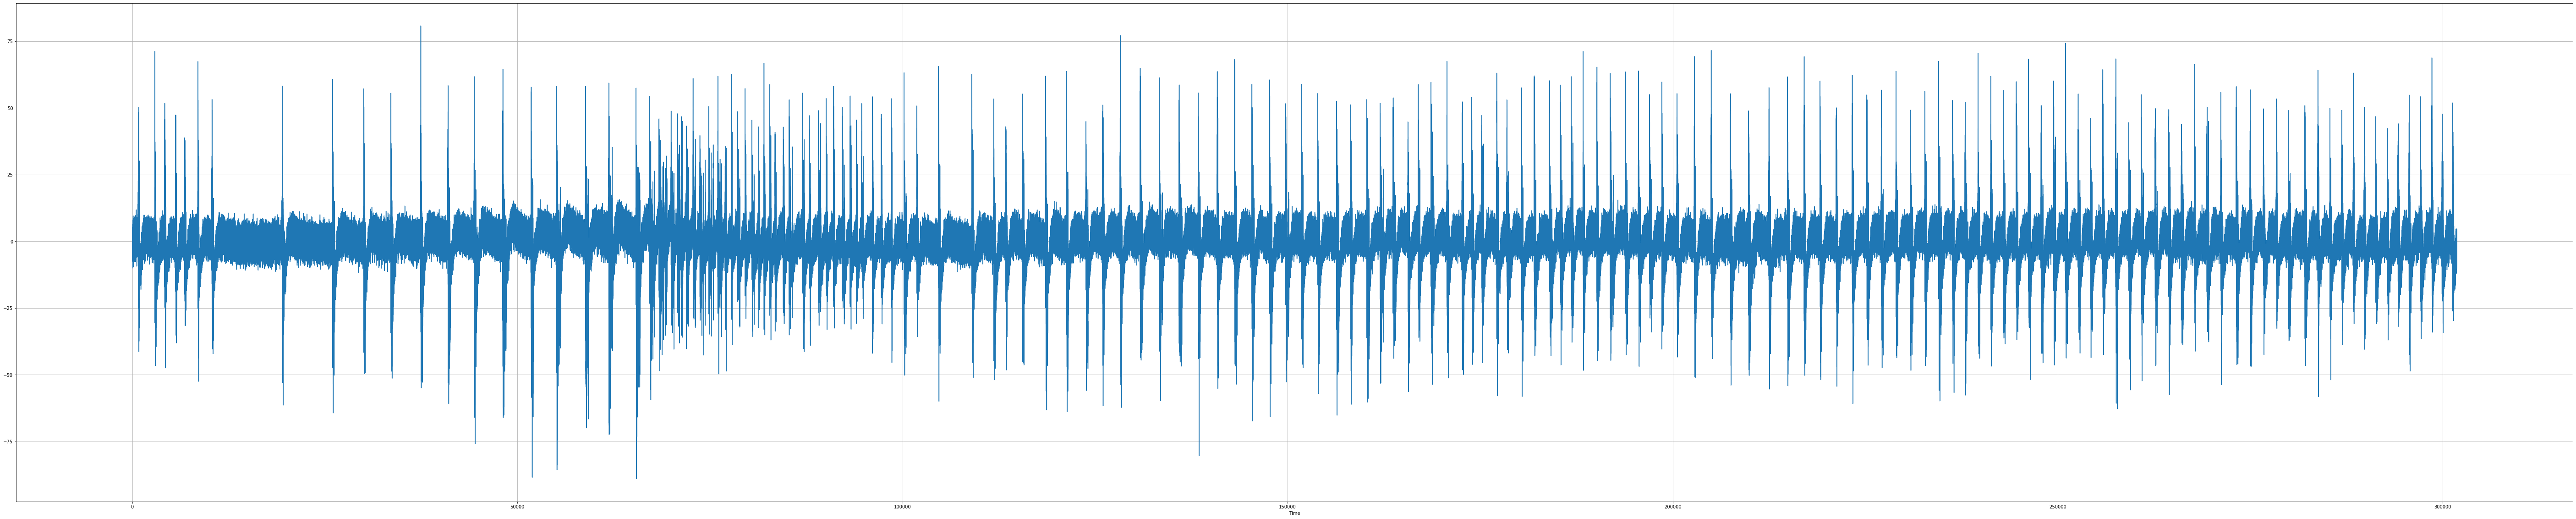

In [52]:
######################################################
#######  WIENER


y = signal.wiener(df.iloc[:,1])
plt.figure(figsize = (100,20))
plt.plot(df.index, y)
plt.xlabel('Time')
plt.grid()

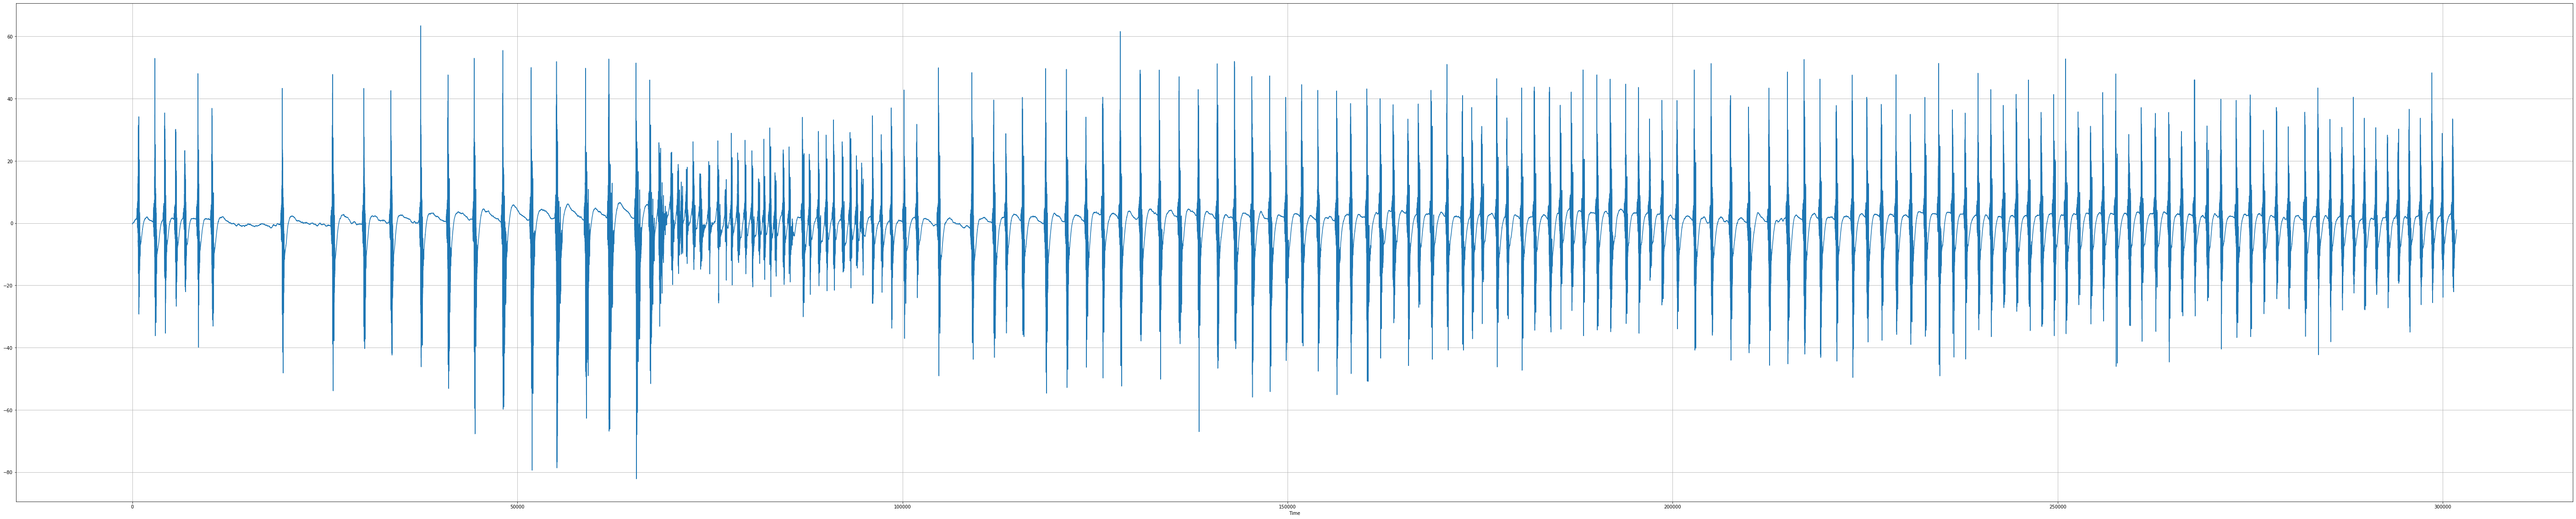

In [51]:
y = signal.wiener(df.iloc[:,1],mysize=10000)
plt.figure(figsize = (100,20))
plt.plot(df.index, y)
plt.xlabel('Time')
plt.grid()

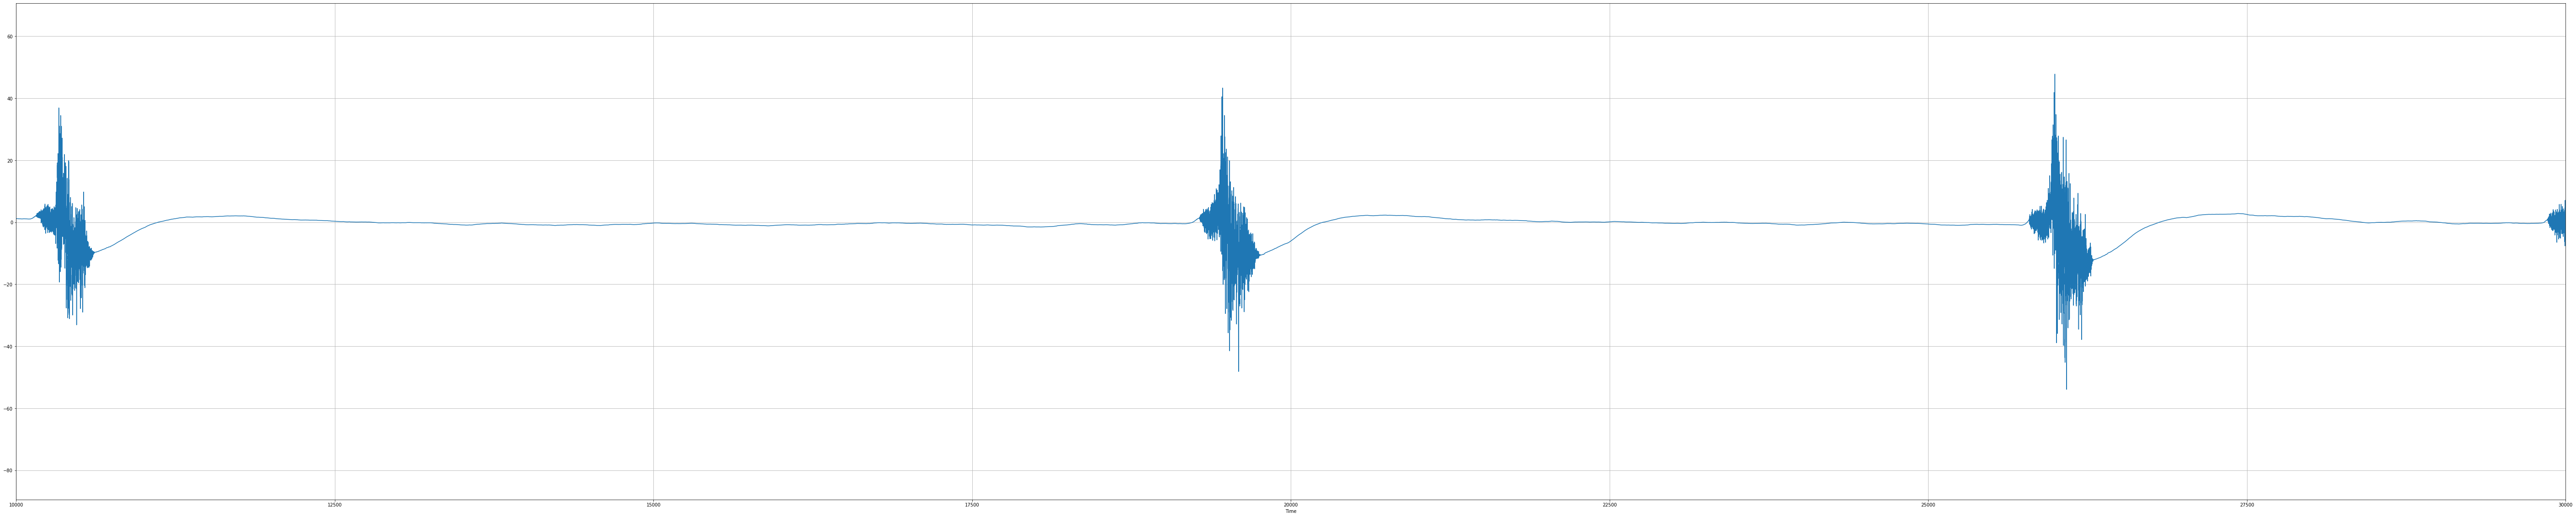

In [50]:
y = signal.wiener(df.iloc[:,1],mysize=10000)
plt.figure(figsize = (100,20))
plt.plot(df.index, y)
plt.xlabel('Time')
plt.xlim(10000,30000)
plt.grid()

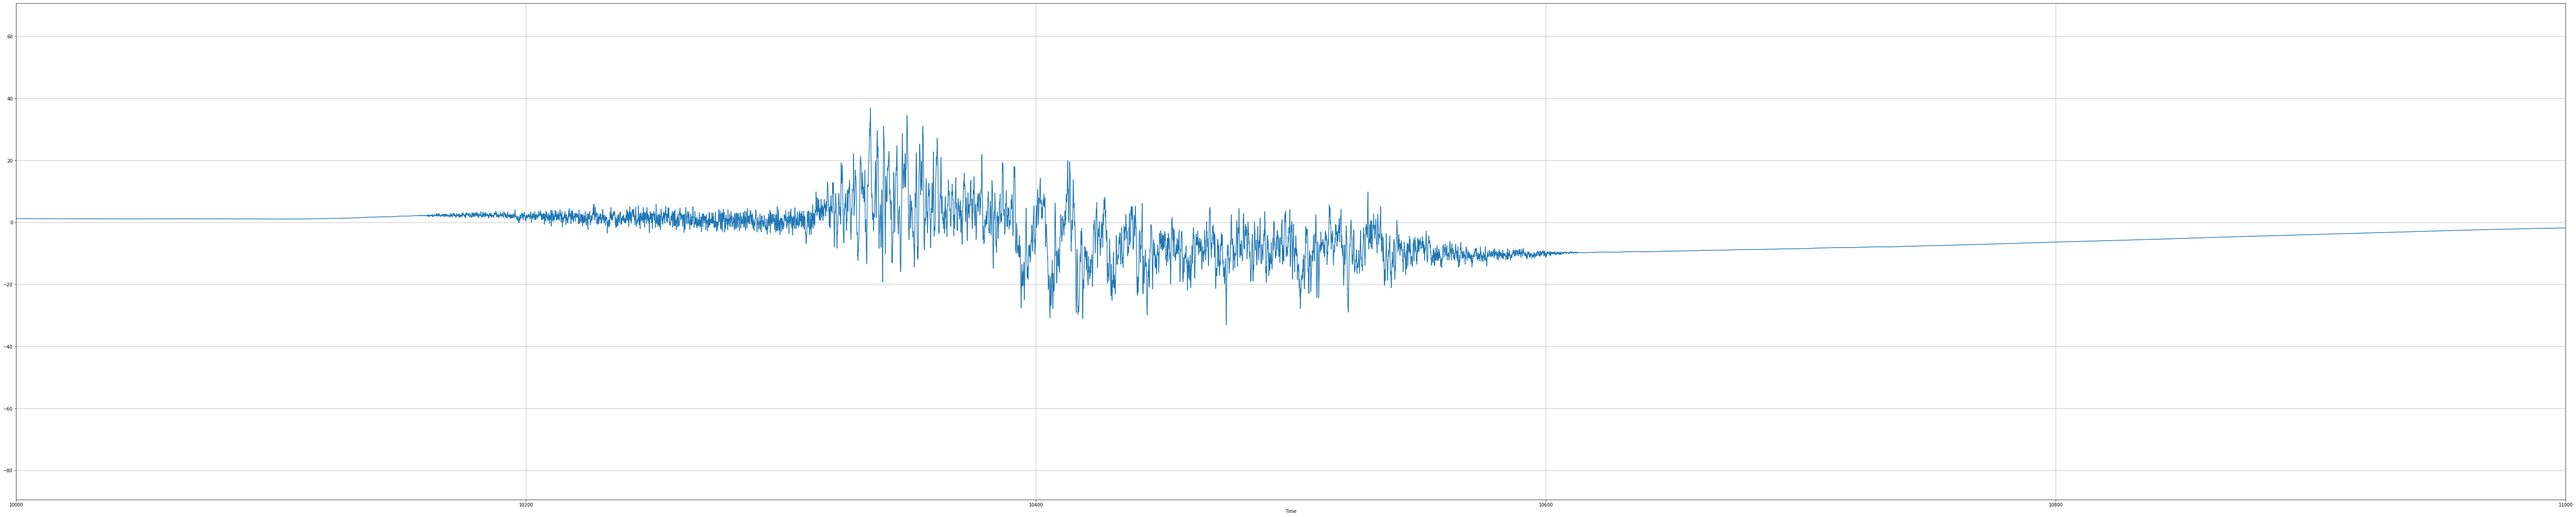

In [49]:
y = signal.wiener(df.iloc[:,1],mysize=10000)
plt.figure(figsize = (100,20))
plt.plot(df.index, y)
plt.xlabel('Time')
plt.xlim(10000,11000)
plt.grid()

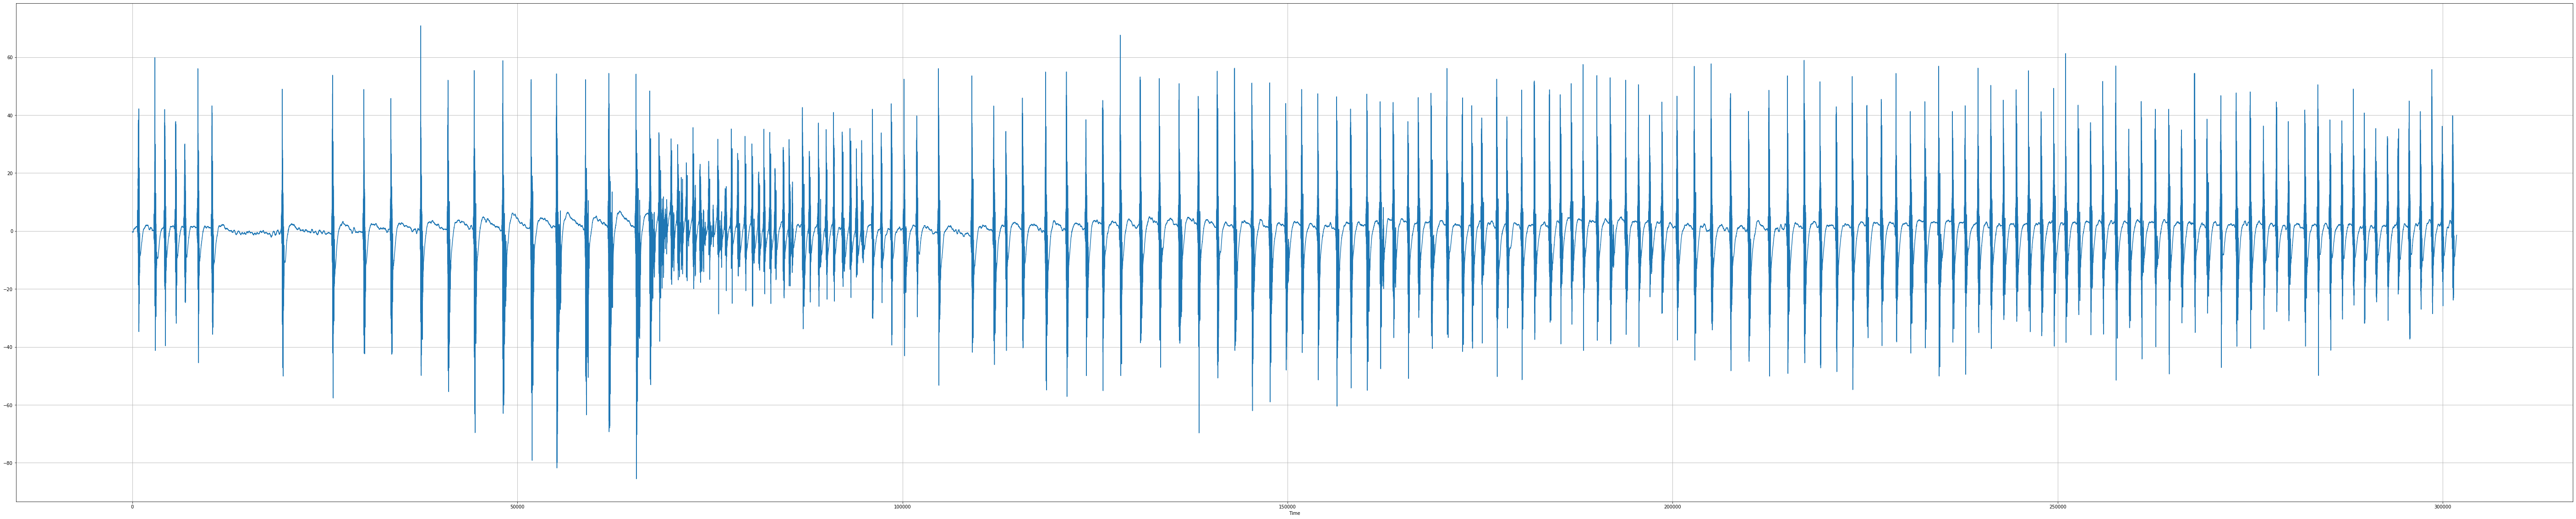

In [53]:
y = signal.wiener(df.iloc[:,1],mysize=5000)
plt.figure(figsize = (100,20))
plt.plot(df.index, y)
plt.xlabel('Time')
#plt.xlim(10000,11000)
plt.grid()

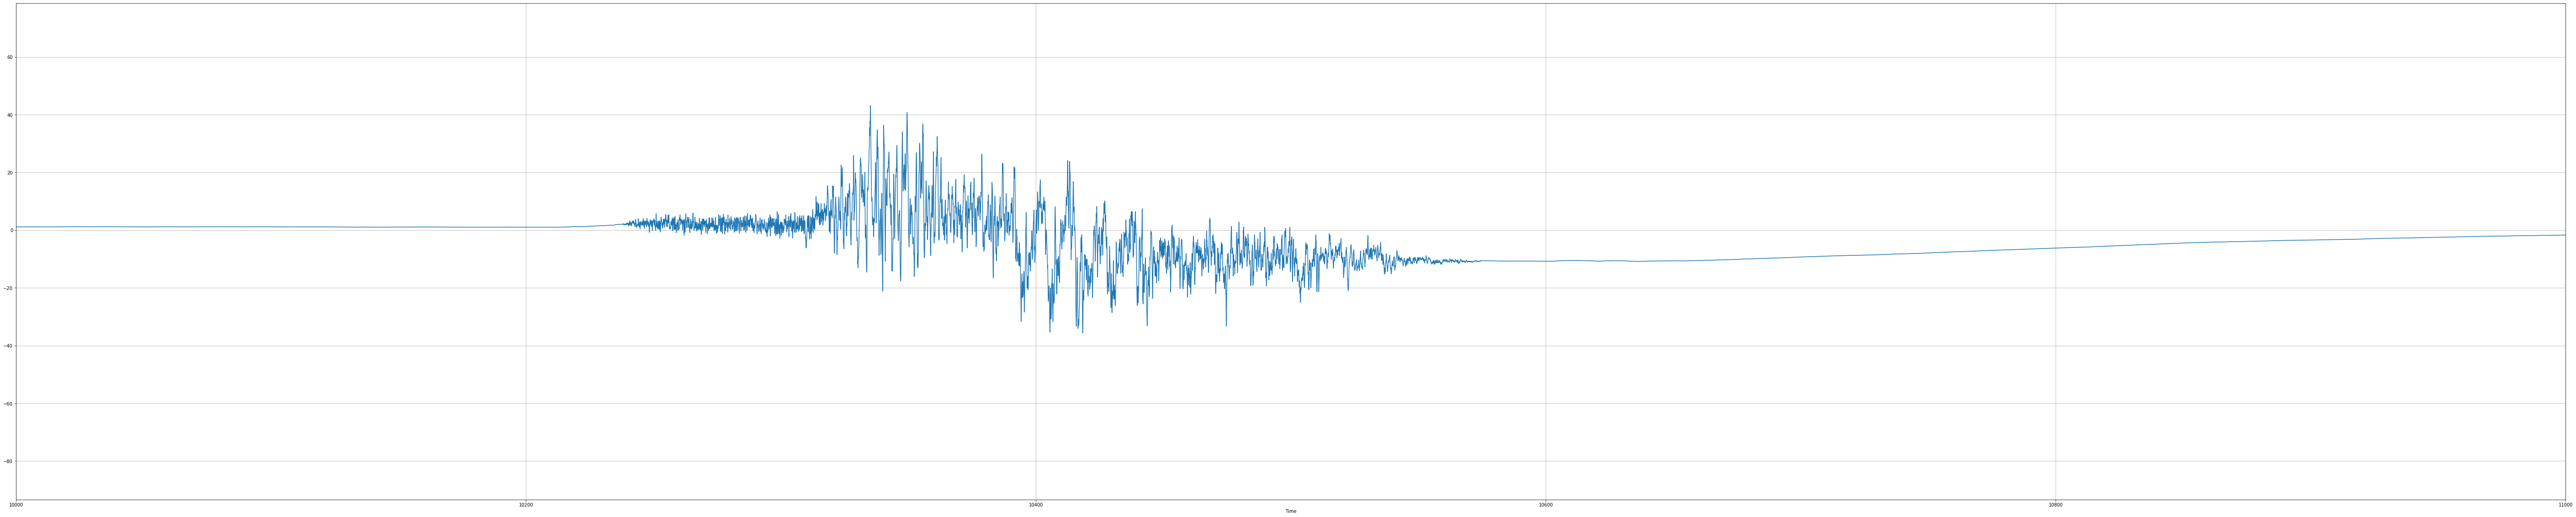

In [54]:
y = signal.wiener(df.iloc[:,1],mysize=5000)
plt.figure(figsize = (100,20))
plt.plot(df.index, y)
plt.xlabel('Time')
plt.xlim(10000,11000)
plt.grid()

In [68]:
######################################################
#######  CONTINUOUS WAVELET TRANSFORM

cwt = signal.cwt(df.iloc[:,1], signal.morlet2,np.arange(1,76))
plt.imshow(cwtmatr, extent=[-1, 1, 1, 31], cmap='PRGn', aspect='auto',
           vmax=abs(cwtmatr).max(), vmin=-abs(cwtmatr).max())
plt.show()

AttributeError: module 'scipy.signal' has no attribute 'morlet2'